In [145]:
import pandas as pd

In [146]:
file_path = "/Users/gouthamjekkula/Desktop/Thesis Folder/TSM10..xlsx"
df = pd.read_excel(file_path, sheet_name="Unpivoted")

In [147]:
df.head()

,Statistic Label,Month,Commodity group,Countries and Territories,UNIT,VALUE
0,Value of Exports,2015 January,Total merchandise trade (0 - 9),Great Britain,Euro Thousand,932143.0
1,Value of Exports,2015 January,Total merchandise trade (0 - 9),Northern Ireland,Euro Thousand,126841.0
2,Value of Exports,2015 January,Live animals except fish etc. (00),Great Britain,Euro Thousand,15901.0
3,Value of Exports,2015 January,Live animals except fish etc. (00),Northern Ireland,Euro Thousand,6677.0
4,Value of Exports,2015 January,Meat and meat preparations (01),Great Britain,Euro Thousand,108156.0


In [148]:
 #Step 1: Clean Month column and convert to datetime
df['Month'] = df['Month'].str.strip()  # remove any spaces
df['Date'] = pd.to_datetime(df['Month'], format='%Y %B', errors='coerce')

# Debug: Check if any rows failed to convert
print("Rows with invalid dates (if any):")
print(df[df['Date'].isna()].head())

# Step 2: Aggregate monthly exports by commodity group
df_grouped = df.groupby(['Date', 'Commodity group'], as_index=False)['VALUE'].sum()

# Step 3: Pivot to EDA-friendly format (all commodity groups as columns)
commodity_monthly = df_grouped.pivot(index='Date', columns='Commodity group', values='VALUE').fillna(0)


Rows with invalid dates (if any):
Empty DataFrame
Columns: [Statistic Label, Month, Commodity group, Countries and Territories, UNIT, VALUE, Date]
Index: []


In [149]:
df.head()

,Statistic Label,Month,Commodity group,Countries and Territories,UNIT,VALUE,Date
0,Value of Exports,2015 January,Total merchandise trade (0 - 9),Great Britain,Euro Thousand,932143.0,2015-01-01
1,Value of Exports,2015 January,Total merchandise trade (0 - 9),Northern Ireland,Euro Thousand,126841.0,2015-01-01
2,Value of Exports,2015 January,Live animals except fish etc. (00),Great Britain,Euro Thousand,15901.0,2015-01-01
3,Value of Exports,2015 January,Live animals except fish etc. (00),Northern Ireland,Euro Thousand,6677.0,2015-01-01
4,Value of Exports,2015 January,Meat and meat preparations (01),Great Britain,Euro Thousand,108156.0,2015-01-01


In [150]:
df_grouped = df.groupby(['Date', 'Commodity group'], as_index=False)['VALUE'].sum()

In [151]:
commodity_monthly = df_grouped.pivot(index='Date', columns='Commodity group', values='VALUE').fillna(0)


In [152]:
df.head()

,Statistic Label,Month,Commodity group,Countries and Territories,UNIT,VALUE,Date
0,Value of Exports,2015 January,Total merchandise trade (0 - 9),Great Britain,Euro Thousand,932143.0,2015-01-01
1,Value of Exports,2015 January,Total merchandise trade (0 - 9),Northern Ireland,Euro Thousand,126841.0,2015-01-01
2,Value of Exports,2015 January,Live animals except fish etc. (00),Great Britain,Euro Thousand,15901.0,2015-01-01
3,Value of Exports,2015 January,Live animals except fish etc. (00),Northern Ireland,Euro Thousand,6677.0,2015-01-01
4,Value of Exports,2015 January,Meat and meat preparations (01),Great Britain,Euro Thousand,108156.0,2015-01-01


In [153]:
df_grouped = df.groupby(['Date', 'Commodity group'], as_index=False)['VALUE'].sum()
print(df_grouped.head(10))  # Show first 10 rows


        Date                                    Commodity group    VALUE
0 2015-01-01  Animal and vegetable oils and fats, processed,...     78.0
1 2015-01-01                          Animal oils and fats (41)    914.0
2 2015-01-01  Articles of apparel and clothing accessories (84)   7736.0
3 2015-01-01                                     Beverages (11)  19447.0
4 2015-01-01               Cereals and cereal preparations (04)  30317.0
5 2015-01-01       Chemical materials and products, n.e.s. (59)  25050.0
6 2015-01-01                     Coal, coke and briquettes (32)   5118.0
7 2015-01-01  Coffee, tea, cocoa, spices and manufactures th...  17203.0
8 2015-01-01            Commodities and transactions n.e.s. (9)   2894.0
9 2015-01-01                                 Cork and wood (24)  11950.0


In [154]:
commodity_monthly = df_grouped.pivot(index='Date', columns='Commodity group', values='VALUE').fillna(0)
print(commodity_monthly.head())  # Show first 5 rows
print(commodity_monthly.shape)   # Check dimensions


Commodity group  Animal and vegetable oils and fats, processed, and waxes (43)  \
Date                                                                             
2015-01-01                                                    78.0               
2015-02-01                                                    91.0               
2015-03-01                                                    97.0               
2015-04-01                                                    66.0               
2015-05-01                                                    80.0               

Commodity group  Animal oils and fats (41)  \
Date                                         
2015-01-01                           914.0   
2015-02-01                          1286.0   
2015-03-01                           839.0   
2015-04-01                           574.0   
2015-05-01                           690.0   

Commodity group  Articles of apparel and clothing accessories (84)  \
Date                            

In [155]:
# Reset index to have Date as a column for Excel
commodity_monthly_reset = commodity_monthly.reset_index()

# Save the pivoted dataset
commodity_monthly_reset.to_excel("Step1_AllCommodityGroups_Exports.xlsx", index=False)

print("Saved pivoted dataset with Date as the first column!")
print("Shape:", commodity_monthly_reset.shape)
print("Preview:\n", commodity_monthly_reset.head())

Saved pivoted dataset with Date as the first column!
Shape: (125, 67)
Preview:
 Commodity group       Date  \
0               2015-01-01   
1               2015-02-01   
2               2015-03-01   
3               2015-04-01   
4               2015-05-01   

Commodity group  Animal and vegetable oils and fats, processed, and waxes (43)  \
0                                                             78.0               
1                                                             91.0               
2                                                             97.0               
3                                                             66.0               
4                                                             80.0               

Commodity group  Animal oils and fats (41)  \
0                                    914.0   
1                                   1286.0   
2                                    839.0   
3                                    574.0   
4               

In [156]:
df.head()

,Statistic Label,Month,Commodity group,Countries and Territories,UNIT,VALUE,Date
0,Value of Exports,2015 January,Total merchandise trade (0 - 9),Great Britain,Euro Thousand,932143.0,2015-01-01
1,Value of Exports,2015 January,Total merchandise trade (0 - 9),Northern Ireland,Euro Thousand,126841.0,2015-01-01
2,Value of Exports,2015 January,Live animals except fish etc. (00),Great Britain,Euro Thousand,15901.0,2015-01-01
3,Value of Exports,2015 January,Live animals except fish etc. (00),Northern Ireland,Euro Thousand,6677.0,2015-01-01
4,Value of Exports,2015 January,Meat and meat preparations (01),Great Britain,Euro Thousand,108156.0,2015-01-01


In [157]:
import pandas as pd

# Load the final pivoted EDA dataset
eda_file = "/Users/gouthamjekkula/Desktop/Thesis Folder/Step1_AllCommodityGroups_Exports.xlsx"
commodity_monthly = pd.read_excel(eda_file)

# to Add the extra descriptive columns
commodity_monthly['Statistic Label'] = 'Value of Exports'
commodity_monthly['Countries and Territories'] = 'United Kingdom (GB + NI)'
commodity_monthly['UNIT'] = 'Euro Thousand'

# to Move the new columns to the front
cols = ['Date','Statistic Label','Countries and Territories','UNIT'] + \
       [col for col in commodity_monthly.columns if col not in ['Date','Statistic Label','Countries and Territories','UNIT']]

commodity_monthly = commodity_monthly[cols]

# Save the updated file
commodity_monthly.to_excel("Step1_AllCommodityGroups_Exports_WithInfo.xlsx", index=False)
print("Updated file saved as Step1_AllCommodityGroups_Exports_WithInfo.xlsx")


Updated file saved as Step1_AllCommodityGroups_Exports_WithInfo.xlsx


In [158]:
import pandas as pd

# Step 0: Load Step 1 dataset (Base for comparison)
step1_file = "/Users/gouthamjekkula/Desktop/Thesis Folder/TSM10_AllCommodityGroups_Exports_WithInfo.xlsx"
step1 = pd.read_excel(step1_file)

# Compute Step 1 monthly total exports
# Assuming first 4 columns are: Date, Statistic Label, Countries, UNIT
commodity_columns = step1.columns[4:]
step1_total = step1.groupby('Date')[commodity_columns].sum()
step1_total['Total_Exports_Step1'] = step1_total.sum(axis=1)

print("Step 1 totals prepared:\n", step1_total.head())



Step 1 totals prepared:
             Animal and vegetable oils and fats, processed, and waxes (43)  \
Date                                                                        
2015-01-01                                               78.0               
2015-02-01                                               91.0               
2015-03-01                                               97.0               
2015-04-01                                               66.0               
2015-05-01                                               80.0               

            Animal oils and fats (41)  \
Date                                    
2015-01-01                      914.0   
2015-02-01                     1286.0   
2015-03-01                      839.0   
2015-04-01                      574.0   
2015-05-01                      690.0   

            Articles of apparel and clothing accessories (84)  Beverages (11)  \
Date                                                              

In [159]:
step1_total.to_excel("Step0_Step1_TotalExports.xlsx")
print("Step 0 totals saved as Step0_Step1_TotalExports.xlsx")


Step 0 totals saved as Step0_Step1_TotalExports.xlsx


In [160]:
# Step 1: Load and filter TSM09 for UK Exports
tsm09_file = "/Users/gouthamjekkula/Desktop/Thesis Folder/TSM09..xlsx"
tsm09 = pd.read_excel(tsm09_file, sheet_name='Unpivoted')

In [161]:
tsm09.head()

,Statistic Label,Month,Commodity Group,Area,UNIT,VALUE
0,Value of Exports,2015 January,Total merchandise trade (0 - 9),United Kingdom,Euro Thousand,1058984.0
1,Value of Exports,2015 January,Live animals except fish etc. (00),United Kingdom,Euro Thousand,22578.0
2,Value of Exports,2015 January,Meat and meat preparations (01),United Kingdom,Euro Thousand,124582.0
3,Value of Exports,2015 January,Dairy products and birds eggs (02),United Kingdom,Euro Thousand,46025.0
4,Value of Exports,2015 January,"Fish, crustaceans, molluscs and preparations t...",United Kingdom,Euro Thousand,3056.0


In [162]:
# Convert Month to datetime
tsm09['Date'] = pd.to_datetime(tsm09['Month'], format='%Y %B', errors='coerce')


In [163]:
tsm09.head()

,Statistic Label,Month,Commodity Group,Area,UNIT,VALUE,Date
0,Value of Exports,2015 January,Total merchandise trade (0 - 9),United Kingdom,Euro Thousand,1058984.0,2015-01-01
1,Value of Exports,2015 January,Live animals except fish etc. (00),United Kingdom,Euro Thousand,22578.0,2015-01-01
2,Value of Exports,2015 January,Meat and meat preparations (01),United Kingdom,Euro Thousand,124582.0,2015-01-01
3,Value of Exports,2015 January,Dairy products and birds eggs (02),United Kingdom,Euro Thousand,46025.0,2015-01-01
4,Value of Exports,2015 January,"Fish, crustaceans, molluscs and preparations t...",United Kingdom,Euro Thousand,3056.0,2015-01-01


In [164]:
# Step 2: Map SITC Commodity Groups to 6 Thesis Sectors
sector_map = {
    'Pharmaceuticals': ['Medicinal and pharmaceutical products (54)'],
    'Agriculture': [
        'Live animals except fish etc. (00)',
        'Cereals and cereal preparations (04)',
        'Vegetables and fruit (05)',
        'Sugar, sugar preparations and honey (06)',
        'Coffee, tea, cocoa, spices and manufactures thereof (07)',
        'Feeding stuffs for animals, excluding unmilled cereals (08)',
        'Miscellaneous edible products and preparations (09)'
    ],
    'Beverages': ['Beverages (11)'],
    'Dairy': ['Dairy products and birds eggs (02)'],
    'Meat': ['Meat and meat preparations (01)'],
    'Vegetables': ['Crude animal and vegetable materials, n.e.s. (29)']
}

def map_sector(commodity):
    for sector, items in sector_map.items():
        if commodity in items:
            return sector
    return 'Other'

tsm09['Sector'] = tsm09['Commodity Group'].apply(map_sector)

# Aggregate monthly exports by 6 sectors
tsm09_sector_monthly = tsm09.groupby(['Date','Sector'])['VALUE'].sum().unstack().fillna(0)

# Compute total exports per month
tsm09_sector_monthly['Total_Exports_TSM09'] = tsm09_sector_monthly.sum(axis=1)

# Save 6-sector aggregated file
tsm09_sector_monthly.to_excel("Step2_TSM09_6Sectors.xlsx")
print("Step 2 (TSM09 6-sector) saved as Step2_TSM09_6Sectors.xlsx")
tsm09.describe()

Step 2 (TSM09 6-sector) saved as Step2_TSM09_6Sectors.xlsx


,VALUE,Date
count,8.208000e+03,8250
mean,4.527271e+04,2020-03-01 13:14:52.800000
min,0.000000e+00,2015-01-01 00:00:00
25%,2.966750e+03,2017-08-01 00:00:00
50%,1.132150e+04,2020-03-01 00:00:00
75%,2.792725e+04,2022-10-01 00:00:00
max,2.744252e+06,2025-05-01 00:00:00
std,1.883273e+05,NaN


In [165]:
# Step 3: Validation Against Step 1
validation = step1_total[['Total_Exports_Step1']].merge(
    tsm09_sector_monthly[['Total_Exports_TSM09']],
    left_index=True, right_index=True, how='inner'
)

# Compute difference and percent difference
validation['Difference'] = validation['Total_Exports_TSM09'] - validation['Total_Exports_Step1']
validation['% Difference'] = (validation['Difference'] / validation['Total_Exports_Step1']) * 100

# Save validation results
validation.to_excel("Step2_Sector_Validation_TSM09.xlsx")
print("Validation file saved as Step2_Sector_Validation_TSM09.xlsx")
print(validation.head())
print(validation.describe())

Validation file saved as Step2_Sector_Validation_TSM09.xlsx
            Total_Exports_Step1  Total_Exports_TSM09  Difference  % Difference
Date                                                                          
2015-01-01            2117975.0            2117970.0        -5.0     -0.000236
2015-02-01            2364012.0            2364014.0         2.0      0.000085
2015-03-01            2771572.0            2771575.0         3.0      0.000108
2015-04-01            2263054.0            2263059.0         5.0      0.000221
2015-05-01            2420245.0            2420240.0        -5.0     -0.000207
       Total_Exports_Step1  Total_Exports_TSM09  Difference  % Difference
count         1.250000e+02         1.250000e+02  125.000000    125.000000
mean          2.972788e+06         2.972787e+06   -0.556632     -0.000023
std           6.317581e+05         6.317586e+05    3.622718      0.000136
min           1.740176e+06         1.740170e+06  -11.000000     -0.000417
25%           2.5

In [166]:
import pandas as pd


# Step 4: Load Step 2 (TSM09 6 Sectors)
tsm09_sector_file = "Step2_TSM09_6Sectors.xlsx"
tsm09_sector_monthly = pd.read_excel(tsm09_sector_file)

# Ensure Date is in datetime format
tsm09_sector_monthly['Date'] = pd.to_datetime(tsm09_sector_monthly['Date'], errors='coerce')


# Step 4a: Compute Sector Weights

# Exclude Date and Total column for percentage calculation
sector_cols = [col for col in tsm09_sector_monthly.columns if col not in ['Date', 'Total_Exports_TSM09']]

# Compute sector weight (%) = (sector / total exports) * 100
sector_weights = tsm09_sector_monthly.copy()
for col in sector_cols:
    sector_weights[col] = (sector_weights[col] / sector_weights['Total_Exports_TSM09']) * 100

# Rename columns for clarity (Optional: add "%")
sector_weights.rename(columns={col: col + " (%)" for col in sector_cols}, inplace=True)

# Save as new Excel file
sector_weights.to_excel("Step4_Sector_Weights_TSM09.xlsx", index=False)
print("Step 4: Sector weight dataset saved as Step4_Sector_Weights_TSM09.xlsx")
print(sector_weights.head())
print(sector_weights.describe())

Step 4: Sector weight dataset saved as Step4_Sector_Weights_TSM09.xlsx
        Date  Agriculture (%)  Beverages (%)  Dairy (%)  Meat (%)  Other (%)  \
0 2015-01-01         6.105044       0.918238   2.173071  5.882142  78.260599   
1 2015-02-01         5.523021       1.077997   2.549012  6.285961  80.638482   
2 2015-03-01         4.931889       0.880330   2.144412  6.164834  81.879798   
3 2015-04-01         5.951281       1.133112   2.875577  6.626297  78.662421   
4 2015-05-01         5.213863       1.110262   3.133574  6.197650  79.210078   

   Pharmaceuticals (%)  Vegetables (%)  Total_Exports_TSM09  
0             6.541689        0.119218              2117970  
1             3.786780        0.138747              2364014  
2             3.874692        0.124045              2771575  
3             4.622504        0.128808              2263059  
4             5.045822        0.088752              2420240  
                             Date  Agriculture (%)  Beverages (%)   Dairy (%

In [167]:
import pandas as pd


# Step 0: Load Required Files
step1_file = "/Users/gouthamjekkula/Desktop/Thesis Folder/Step1_TotalExports.xlsx"      # Baseline totals (Step 1)
step2_file = "/Users/gouthamjekkula/Desktop/Thesis Folder/Step2_TSM09_6Sectors.xlsx"          # 6-sector exports (Step 2)
step4_file = "/Users/gouthamjekkula/Desktop/Thesis Folder/Step4_Sector_Weights_TSM09.xlsx"    # 6-sector weights (Step 4)

step1_total = pd.read_excel(step1_file)
step2_sectors = pd.read_excel(step2_file)
step4_weights = pd.read_excel(step4_file)

# Ensure Date column is in datetime format
for df in [step1_total, step2_sectors, step4_weights]:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 1: Merge 6-Sector Exports with Sector Weights

# Removed duplicate Total_Exports_TSM09 in weights file if present
sector_weights_only = step4_weights.drop(columns=['Total_Exports_TSM09'], errors='ignore')

# Merge on Date
export_master_dataset = step2_sectors.merge(sector_weights_only, on='Date', how='left')

# Step 2: Merge Step 1 Total_Exports_Step1 for reference
export_master_dataset = export_master_dataset.merge(
    step1_total[['Date', 'Total_Exports_Step1']],
    on='Date',
    how='left'
)

# Step 3: Add Descriptive Columns
export_master_dataset.insert(1, 'Statistic Label', 'Value of Exports')
export_master_dataset.insert(2, 'Country', 'United Kingdom (GB + NI)')
export_master_dataset.insert(3, 'UNIT', 'Euro Thousand')

# Step 4: Save Master Dataset
export_master_dataset.to_excel("Export_Master_Dataset.xlsx", index=False)

print("Export Master Dataset saved as Export_Master_Dataset.xlsx")
print("Shape:", export_master_dataset.shape)
print("Preview:\n", export_master_dataset.head())
print("Preview:\n", export_master_dataset.describe())

Export Master Dataset saved as Export_Master_Dataset.xlsx
Shape: (125, 20)
Preview:
         Date   Statistic Label                   Country           UNIT  \
0 2015-01-01  Value of Exports  United Kingdom (GB + NI)  Euro Thousand   
1 2015-02-01  Value of Exports  United Kingdom (GB + NI)  Euro Thousand   
2 2015-03-01  Value of Exports  United Kingdom (GB + NI)  Euro Thousand   
3 2015-04-01  Value of Exports  United Kingdom (GB + NI)  Euro Thousand   
4 2015-05-01  Value of Exports  United Kingdom (GB + NI)  Euro Thousand   

   Agriculture  Beverages  Dairy    Meat    Other  Pharmaceuticals  \
0       129303      19448  46025  124582  1657536           138551   
1       130565      25484  60259  148601  1906305            89520   
2       136691      24399  59434  170863  2269360           107390   
3       134681      25643  65076  149957  1780177           104610   
4       126188      26871  75840  149998  1917074           122121   

   Vegetables  Total_Exports_TSM09  Agricul

In [168]:
import pandas as pd

# Load your current master dataset
file_path = "/Users/gouthamjekkula/Desktop/Thesis Folder/Export_Master_Dataset.xlsx"
export_master = pd.read_excel(file_path)

# Step 1: Drop the duplicate Step 1 total column

if 'Total_Exports_Step1_y' in export_master.columns:
    export_master = export_master.drop(columns=['Total_Exports_Step1_y'])

# Rename x column to a clear name
export_master.rename(columns={'Total_Exports_Step1_x': 'Total_Exports_Step1'}, inplace=True)

# Step 2: Save Cleaned Master Dataset
export_master.to_excel("Export_Master_Dataset_Clean.xlsx", index=False)

print("Cleaned master dataset saved as Export_Master_Dataset_Clean.xlsx")
print("Shape:", export_master.shape)
print("Preview:\n", export_master.head())
print("Preview:\n", export_master.describe())

Cleaned master dataset saved as Export_Master_Dataset_Clean.xlsx
Shape: (125, 20)
Preview:
         Date   Statistic Label                   Country           UNIT  \
0 2015-01-01  Value of Exports  United Kingdom (GB + NI)  Euro Thousand   
1 2015-02-01  Value of Exports  United Kingdom (GB + NI)  Euro Thousand   
2 2015-03-01  Value of Exports  United Kingdom (GB + NI)  Euro Thousand   
3 2015-04-01  Value of Exports  United Kingdom (GB + NI)  Euro Thousand   
4 2015-05-01  Value of Exports  United Kingdom (GB + NI)  Euro Thousand   

   Agriculture  Beverages  Dairy    Meat    Other  Pharmaceuticals  \
0       129303      19448  46025  124582  1657536           138551   
1       130565      25484  60259  148601  1906305            89520   
2       136691      24399  59434  170863  2269360           107390   
3       134681      25643  65076  149957  1780177           104610   
4       126188      26871  75840  149998  1917074           122121   

   Vegetables  Total_Exports_TSM09  

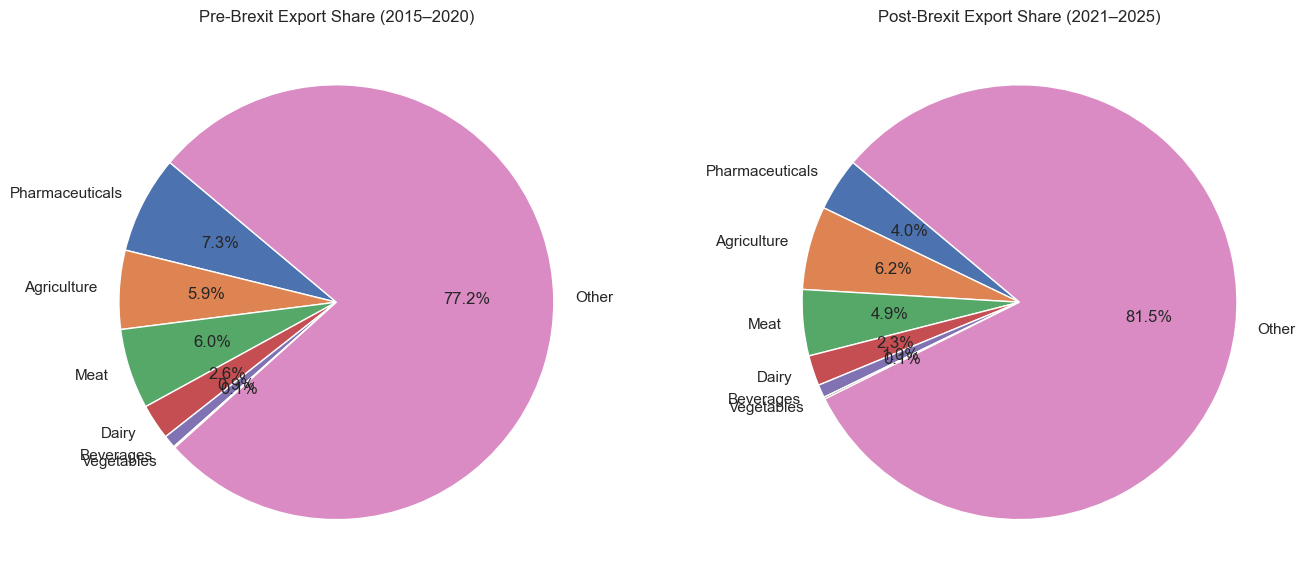

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

# Load updated dataset
file_path = "/Users/gouthamjekkula/Desktop/Thesis Folder/Export_Master_Dataset.xlsx"
df = pd.read_excel(file_path)

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define pre and post Brexit periods
pre_brexit = df[(df['Date'] >= "2015-01-01") & (df['Date'] <= "2020-12-31")]
post_brexit = df[df['Date'] >= "2021-01-01"]

# Define sector columns (based on prior context)
sectors = ['Pharmaceuticals', 'Agriculture', 'Meat', 'Dairy', 'Beverages', 'Vegetables', 'Other']

# Calculated average share of each sector relative to Total_Exports_TSM09
pre_sector_share = pre_brexit[sectors].mean() / pre_brexit['Total_Exports_TSM09'].mean() * 100
post_sector_share = post_brexit[sectors].mean() / post_brexit['Total_Exports_TSM09'].mean() * 100

# Plot pre-Brexit pie chart
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(pre_sector_share, labels=pre_sector_share.index, autopct='%1.1f%%', startangle=140)
plt.title("Pre-Brexit Export Share (2015–2020)")

# Plot post-Brexit pie chart
plt.subplot(1, 2, 2)
plt.pie(post_sector_share, labels=post_sector_share.index, autopct='%1.1f%%', startangle=140)
plt.title("Post-Brexit Export Share (2021–2025)")

plt.tight_layout()
plt.show()


In [170]:
import pandas as pd

# Load TSM06 Unpivoted
file_path = "/Users/gouthamjekkula/Desktop/Thesis Folder/TSM06..xlsx"
tsm06_unpivoted = pd.read_excel(file_path, sheet_name='Unpivoted')

# Convert Month to Date
tsm06_unpivoted['Date'] = pd.to_datetime(tsm06_unpivoted['Month'], format='%Y %B', errors='coerce')

# Pivot to Date × Commodity Group
commodity_exports = tsm06_unpivoted.pivot_table(
    index='Date',
    columns='Commodity Group',
    values='VALUE',
    aggfunc='sum'
).fillna(0)

# Map commodity groups to 6 thesis sectors
sector_mapping = {
    'Pharmaceuticals': ['Medicinal and pharmaceutical products (54)'],
    'Agriculture': [
        'Live animals except fish etc. (00)',
        'Cereals and cereal preparations (04)',
        'Vegetables and fruit (05)',
        'Sugar, sugar preparations and honey (06)',
        'Coffee, tea, cocoa, spices and manufactures thereof (07)',
        'Feeding stuffs for animals, excluding unmilled cereals (08)',
        'Miscellaneous edible products and preparations (09)'
    ],
    'Meat': ['Meat and meat preparations (01)'],
    'Dairy': ['Dairy products and birds eggs (02)'],
    'Beverages': ['Beverages (11)'],
    'Vegetables': ['Crude animal and vegetable materials, n.e.s. (29)']
}

# Calculated sector totals
sector_exports = pd.DataFrame(index=commodity_exports.index)
for sector, commodities in sector_mapping.items():
    existing_cols = [col for col in commodities if col in commodity_exports.columns]
    sector_exports[sector] = commodity_exports[existing_cols].sum(axis=1)

# Calculated "Other" as residual of total minus 6 sectors
sector_exports['Other'] = commodity_exports.sum(axis=1) - sector_exports.sum(axis=1)
sector_exports['Total_Exports'] = commodity_exports.sum(axis=1)

# Added metadata columns
sector_exports.reset_index(inplace=True)
sector_exports.insert(1, 'Statistic Label', 'Value of Exports')
sector_exports.insert(2, 'UNIT', 'Euro Thousand')
sector_exports.insert(3, 'VALUE', sector_exports['Total_Exports'])

# Save to Excel
sector_exports.to_excel("Step4_TSM06_Sector_Exports.xlsx", index=False)

print("Step 4c sector-level dataset saved as Step4c_TSM06_Sector_Exports.xlsx")
print("Shape:", sector_exports.shape)
print("Preview:\n", sector_exports.head())
print("Preview:\n", sector_exports.describe())

Step 4c sector-level dataset saved as Step4c_TSM06_Sector_Exports.xlsx
Shape: (641, 12)
Preview:
         Date   Statistic Label           UNIT     VALUE  Pharmaceuticals  \
0 1972-01-01  Value of Exports  Euro Thousand  117117.0           1286.0   
1 1972-02-01  Value of Exports  Euro Thousand  130188.0            744.0   
2 1972-03-01  Value of Exports  Euro Thousand  141963.0           1374.0   
3 1972-04-01  Value of Exports  Euro Thousand  110979.0           1167.0   
4 1972-05-01  Value of Exports  Euro Thousand  154093.0            946.0   

   Agriculture     Meat   Dairy  Beverages  Vegetables     Other  \
0       9835.0   7806.0  2421.0     1196.0       197.0   94376.0   
1      12461.0   7629.0  2124.0     1326.0       235.0  105669.0   
2      13718.0   9415.0  4226.0     1413.0       201.0  111616.0   
3      10660.0   7941.0  1336.0     1274.0       221.0   88380.0   
4      12105.0  10323.0  4711.0     1456.0       254.0  124298.0   

   Total_Exports  
0       117117.0 

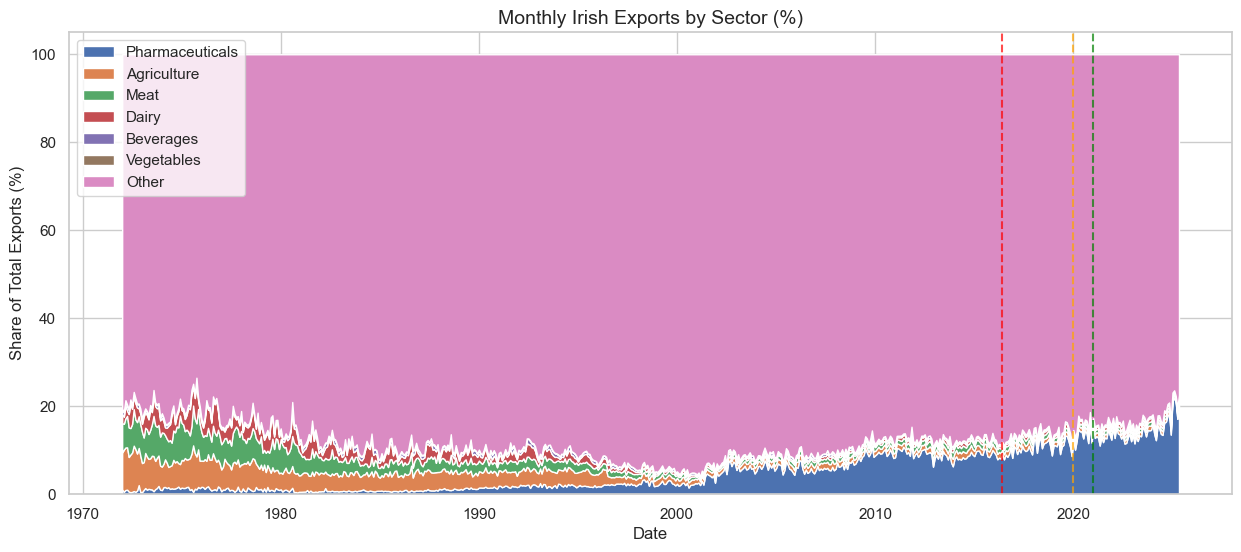

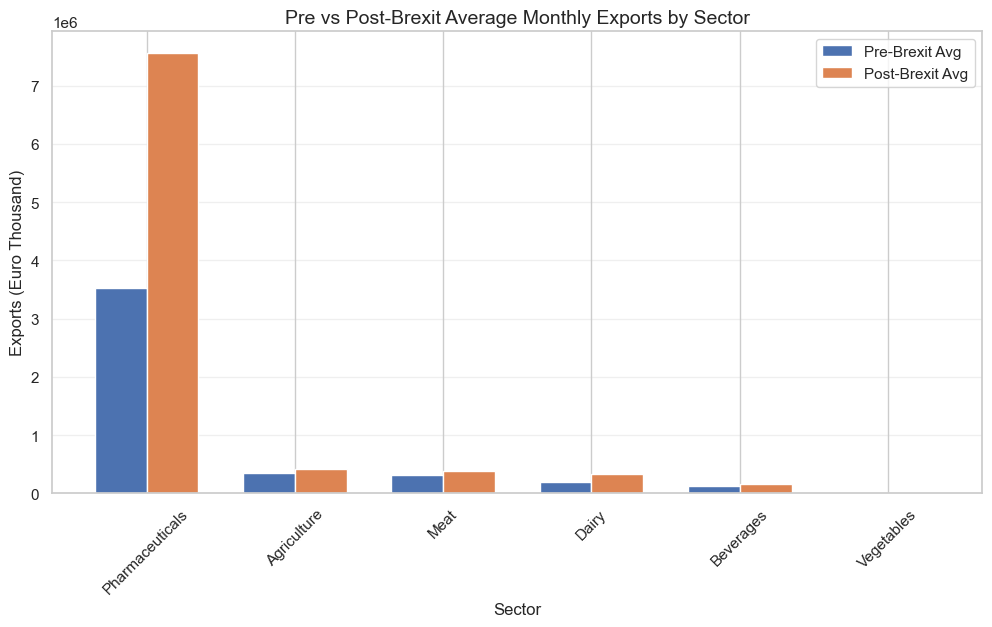

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Step 4c sector dataset
file_path = "/Users/gouthamjekkula/Desktop/Thesis Folder/Step3c_TSM06_Sector_Exports.xlsx"
sector_exports = pd.read_excel(file_path)

# Ensure Date column is datetime
sector_exports['Date'] = pd.to_datetime(sector_exports['Date'])

# Step 2: Define the 6 thesis sectors
sectors = ['Pharmaceuticals', 'Agriculture', 'Meat', 'Dairy', 'Beverages', 'Vegetables']
other_col = 'Other'



# Step 4: Stacked Area Chart - Sector Shares (%)
sector_percent = sector_exports.copy()
sector_percent[sectors + [other_col]] = sector_percent[sectors + [other_col]].div(
    sector_percent['Total_Exports'], axis=0) * 100

plt.figure(figsize=(15,6))
plt.stackplot(sector_percent['Date'], 
              *[sector_percent[col] for col in sectors + [other_col]], 
              labels=sectors + [other_col])
plt.title('Monthly Irish Exports by Sector (%)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Share of Total Exports (%)')
plt.legend(loc='upper left')
plt.axvline(pd.to_datetime('2016-06-01'), color='red', linestyle='--', alpha=0.7)
plt.axvline(pd.to_datetime('2020-01-01'), color='orange', linestyle='--', alpha=0.7)
plt.axvline(pd.to_datetime('2021-01-01'), color='green', linestyle='--', alpha=0.7)
plt.show()

# Step 5: Pre vs Post-Brexit Comparison (Bar Chart)
# Defined Pre-Brexit (2015-01 to 2020-12) and Post-Brexit (2021-01 onwards)
pre_period = sector_exports[(sector_exports['Date'] >= '2015-01-01') & (sector_exports['Date'] <= '2020-12-31')]
post_period = sector_exports[sector_exports['Date'] >= '2021-01-01']

pre_avg = pre_period[sectors].mean()
post_avg = post_period[sectors].mean()

# Create bar chart
import numpy as np
x = np.arange(len(sectors))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, pre_avg, width, label='Pre-Brexit Avg')
plt.bar(x + width/2, post_avg, width, label='Post-Brexit Avg')

plt.title('Pre vs Post-Brexit Average Monthly Exports by Sector', fontsize=14)
plt.xlabel('Sector')
plt.ylabel('Exports (Euro Thousand)')
plt.xticks(x, sectors, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()
